<a href="https://colab.research.google.com/github/sakshi-08-da/PRODIGY_DS_04/blob/main/analyze_visualize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt


In [6]:
path = "/content/twitter_training.csv.zip"
df = pd.read_csv(path, header=None)
df.head(5)

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [8]:
col_names=['ID','Entity','Sentiments',' Contest']
df = pd.read_csv(path, names=col_names)
df.head(5)


,ID,Entity,Sentiments,Contest
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [9]:
df.shape

(74682, 4)

In [10]:
df.describe

<bound method NDFrame.describe of          ID       Entity Sentiments  \
0      2401  Borderlands   Positive   
1      2401  Borderlands   Positive   
2      2401  Borderlands   Positive   
3      2401  Borderlands   Positive   
4      2401  Borderlands   Positive   
...     ...          ...        ...   
74677  9200       Nvidia   Positive   
74678  9200       Nvidia   Positive   
74679  9200       Nvidia   Positive   
74680  9200       Nvidia   Positive   
74681  9200       Nvidia   Positive   

                                                 Contest  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that my Mac window partition is ...  
74679  Just realized the windows partition of my Mac ...  
74680  Just realized between the windows partition of...  
74681  Just like the windows partition of my Mac is l...  

[74682 rows x 4 columns]>

In [11]:
df.isnull().sum()

,0
ID,0
Entity,0
Sentiments,0
Contest,686


In [12]:
df.dropna(axis=0, inplace=True)

In [13]:
df.isnull().sum()

,0
ID,0
Entity,0
Sentiments,0
Contest,0


In [14]:
df.duplicated().sum()

np.int64(2340)

In [15]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [16]:
df.shape

(71656, 4)

In [19]:
sentiment_counts=df['Sentiments'].value_counts()
sentiment_counts

,count
Sentiments,
Negative,21698
Positive,19713
Neutral,17708
Irrelevant,12537


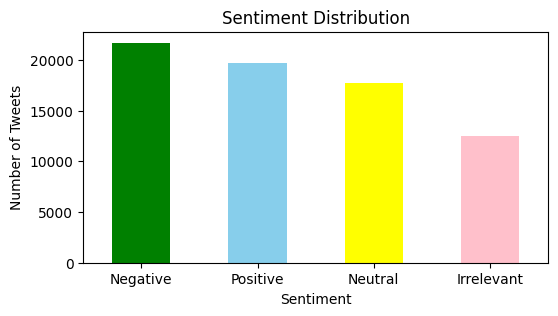

In [20]:
plt.figure(figsize=(6,3))
sentiment_counts.plot(kind='bar', color=['green','skyblue','yellow','pink'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

In [21]:
brand_data=df[df['Entity'].str.contains('Microsoft', case=False)]
brand_sentiment_counts=brand_data['Sentiments'].value_counts()
brand_sentiment_counts

,count
Sentiments,
Neutral,816
Negative,748
Positive,573
Irrelevant,167


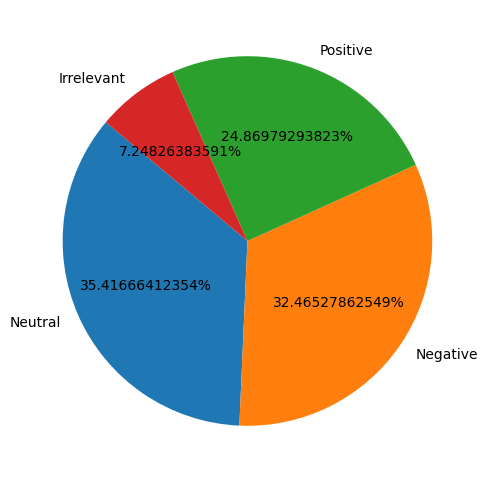

In [22]:
plt.figure(figsize=(6,6))
plt.pie(brand_sentiment_counts, labels=brand_sentiment_counts.index, autopct='%1.11f%%', startangle=140)
plt.show()